# 模型训练

```{note}
可以使用 [Weights & Biases](https://docs.wandb.ai/v/zh-hans/) 可视化训练过程。
```

In [1]:
import sys
from pathlib import Path

ROOT = Path('yolov5/') # YOLOv5 根目录
if str(ROOT) not in sys.path:
    sys.path.append(ROOT.as_posix())

In [2]:
import torch

model_name = 'yolov5m'
image_size = 640
batch_size = 16
epochs = 20
device = 0 if torch.cuda.is_available() else 'cpu'
saved_model_name = 'best.pt'

device

0

In [4]:
!python yolov5/train.py --weights yolov5m.pt \
        --cfg yolov5/models/yolov5m.yaml --data datasets/face_mask.yaml \
        --hyp yolov5/data/hyps/hyp.scratch.yaml --epochs 20 --batch-size 16 \
        --img-size 640 --device 0

train: weights=yolov5m.pt, cfg=yolov5/models/yolov5m.yaml, data=datasets/face_mask.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com.cnpmjs.org/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-192-g436ffc4 torch 1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11017MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

In [3]:
!python yolov5/train.py --weights yolov5s.pt \
        --cfg yolov5/models/yolov5s.yaml --data datasets/face_mask.yaml \
        --hyp yolov5/data/hyps/hyp.scratch.yaml --epochs 20 --batch-size 16 \
        --img-size 640 --device 0

train: weights=yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=datasets/face_mask.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (40/40), done.
remote: Total 88 (delta 39), reused 39 (delta 39), pack-reused 48
展开对象中: 100% (88/88), 77.54 KiB | 690.00 KiB/s, 完成.
来自 https://github.com.cnpmjs.org/ultralytics/yolov5
   436ffc4..bd815d4  master              -> origin/master
   322cdc0..4c9e629  classifier          -> origin/classifier
  

In [4]:
!python yolov5/train.py --weights yolov5l.pt \
        --cfg yolov5/models/yolov5l.yaml --data datasets/face_mask.yaml \
        --hyp yolov5/data/hyps/hyp.scratch.yaml --epochs 20 --batch-size 16 \
        --img-size 640 --device 0

train: weights=yolov5l.pt, cfg=yolov5/models/yolov5l.yaml, data=datasets/face_mask.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 13 commits. Use `git pull` or `git clone https://github.com.cnpmjs.org/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.0-192-g436ffc4 torch 1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11017MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=

In [7]:
!cp -r yolov5/runs/train/exp3/weights/ submission/

## 可视化

In [22]:
from IPython.display import Image

In [26]:
exp_dir = 'yolov5/runs/train/exp3'

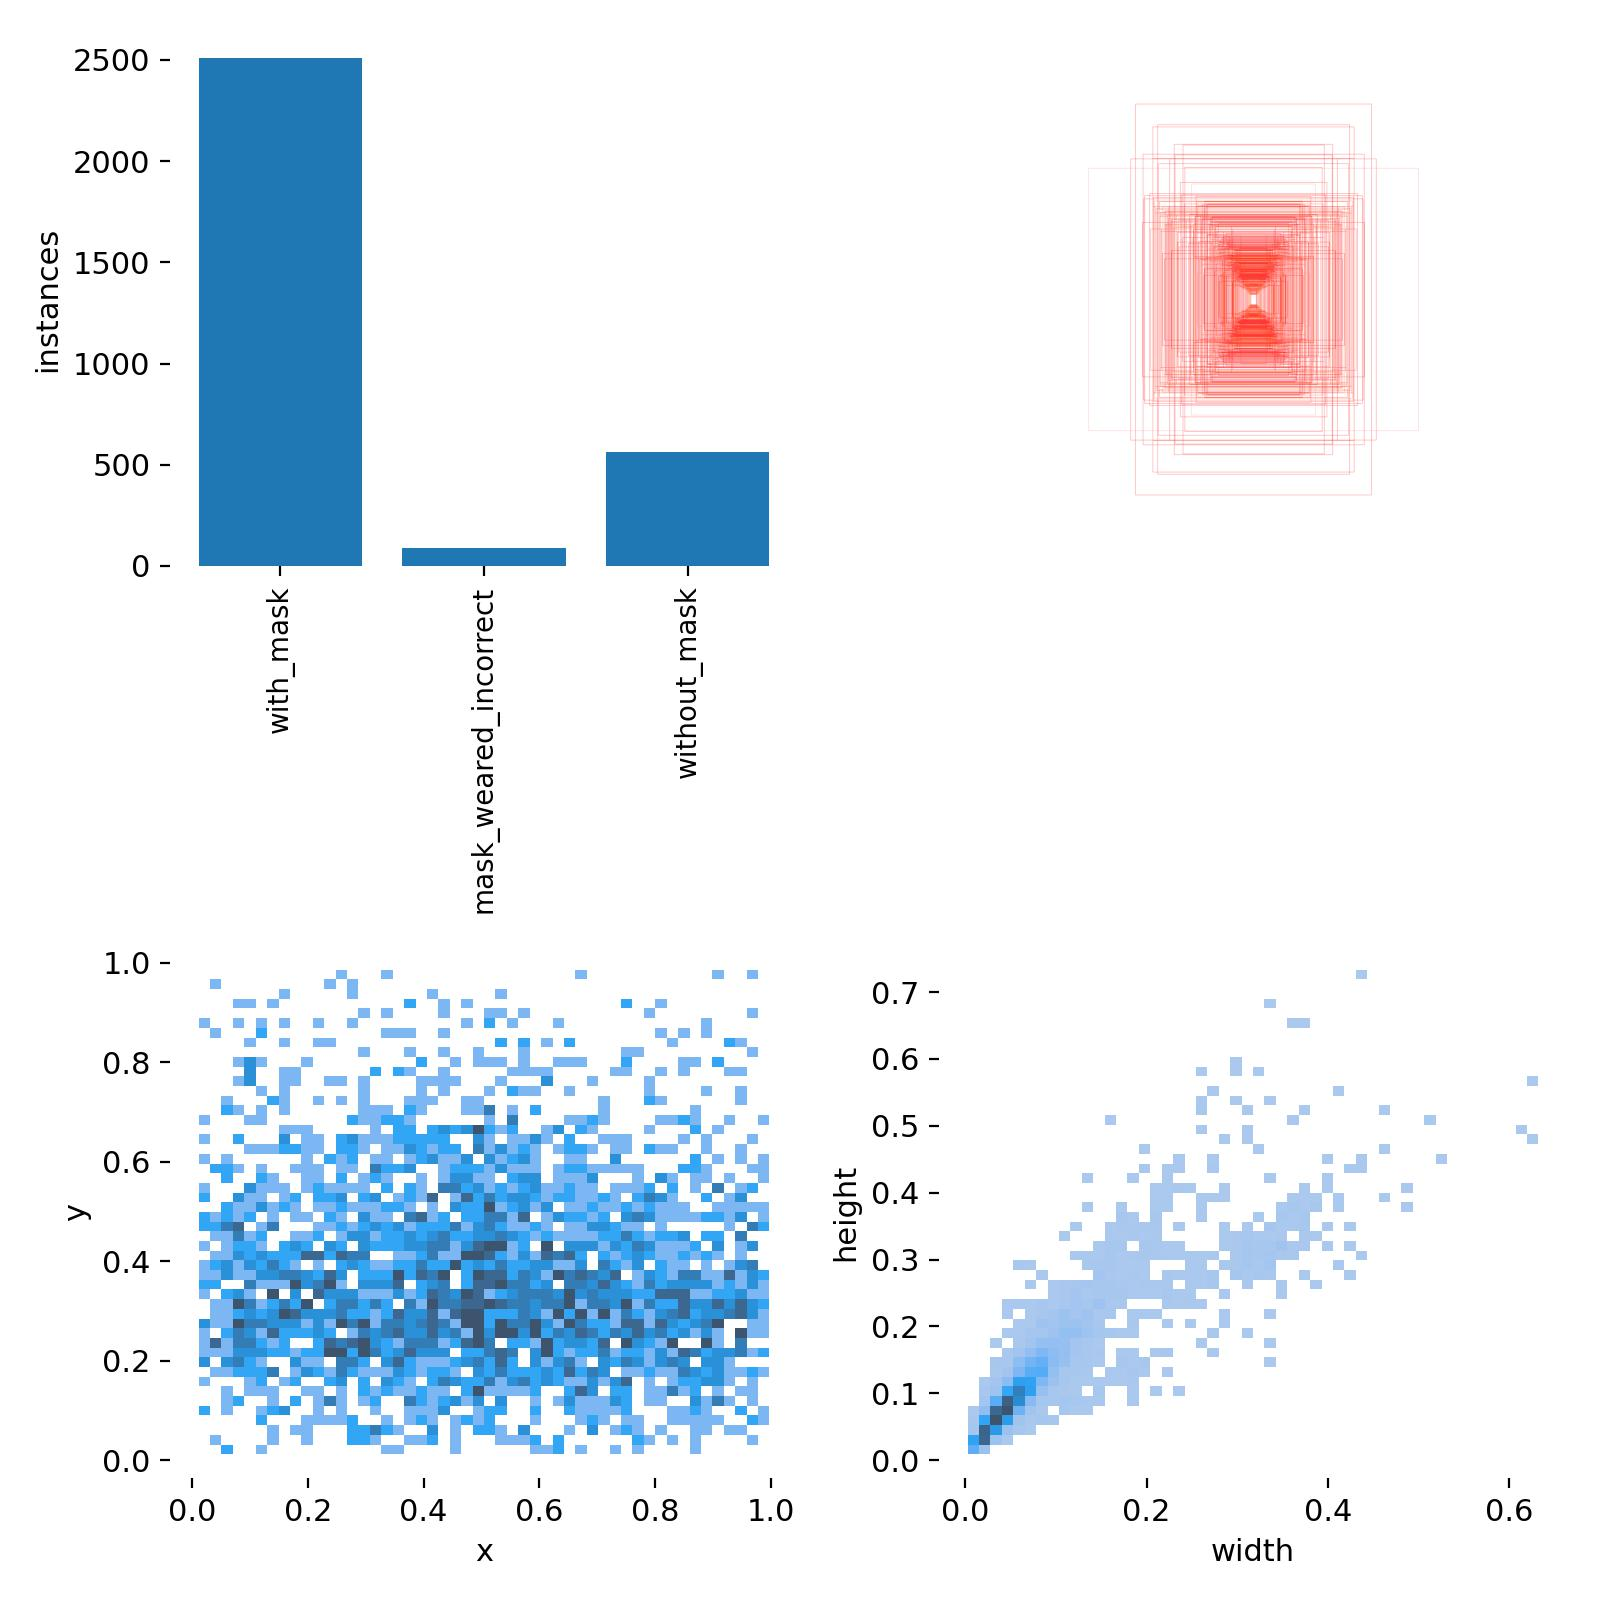

In [27]:
Image(f'{exp_dir}/labels.jpg')

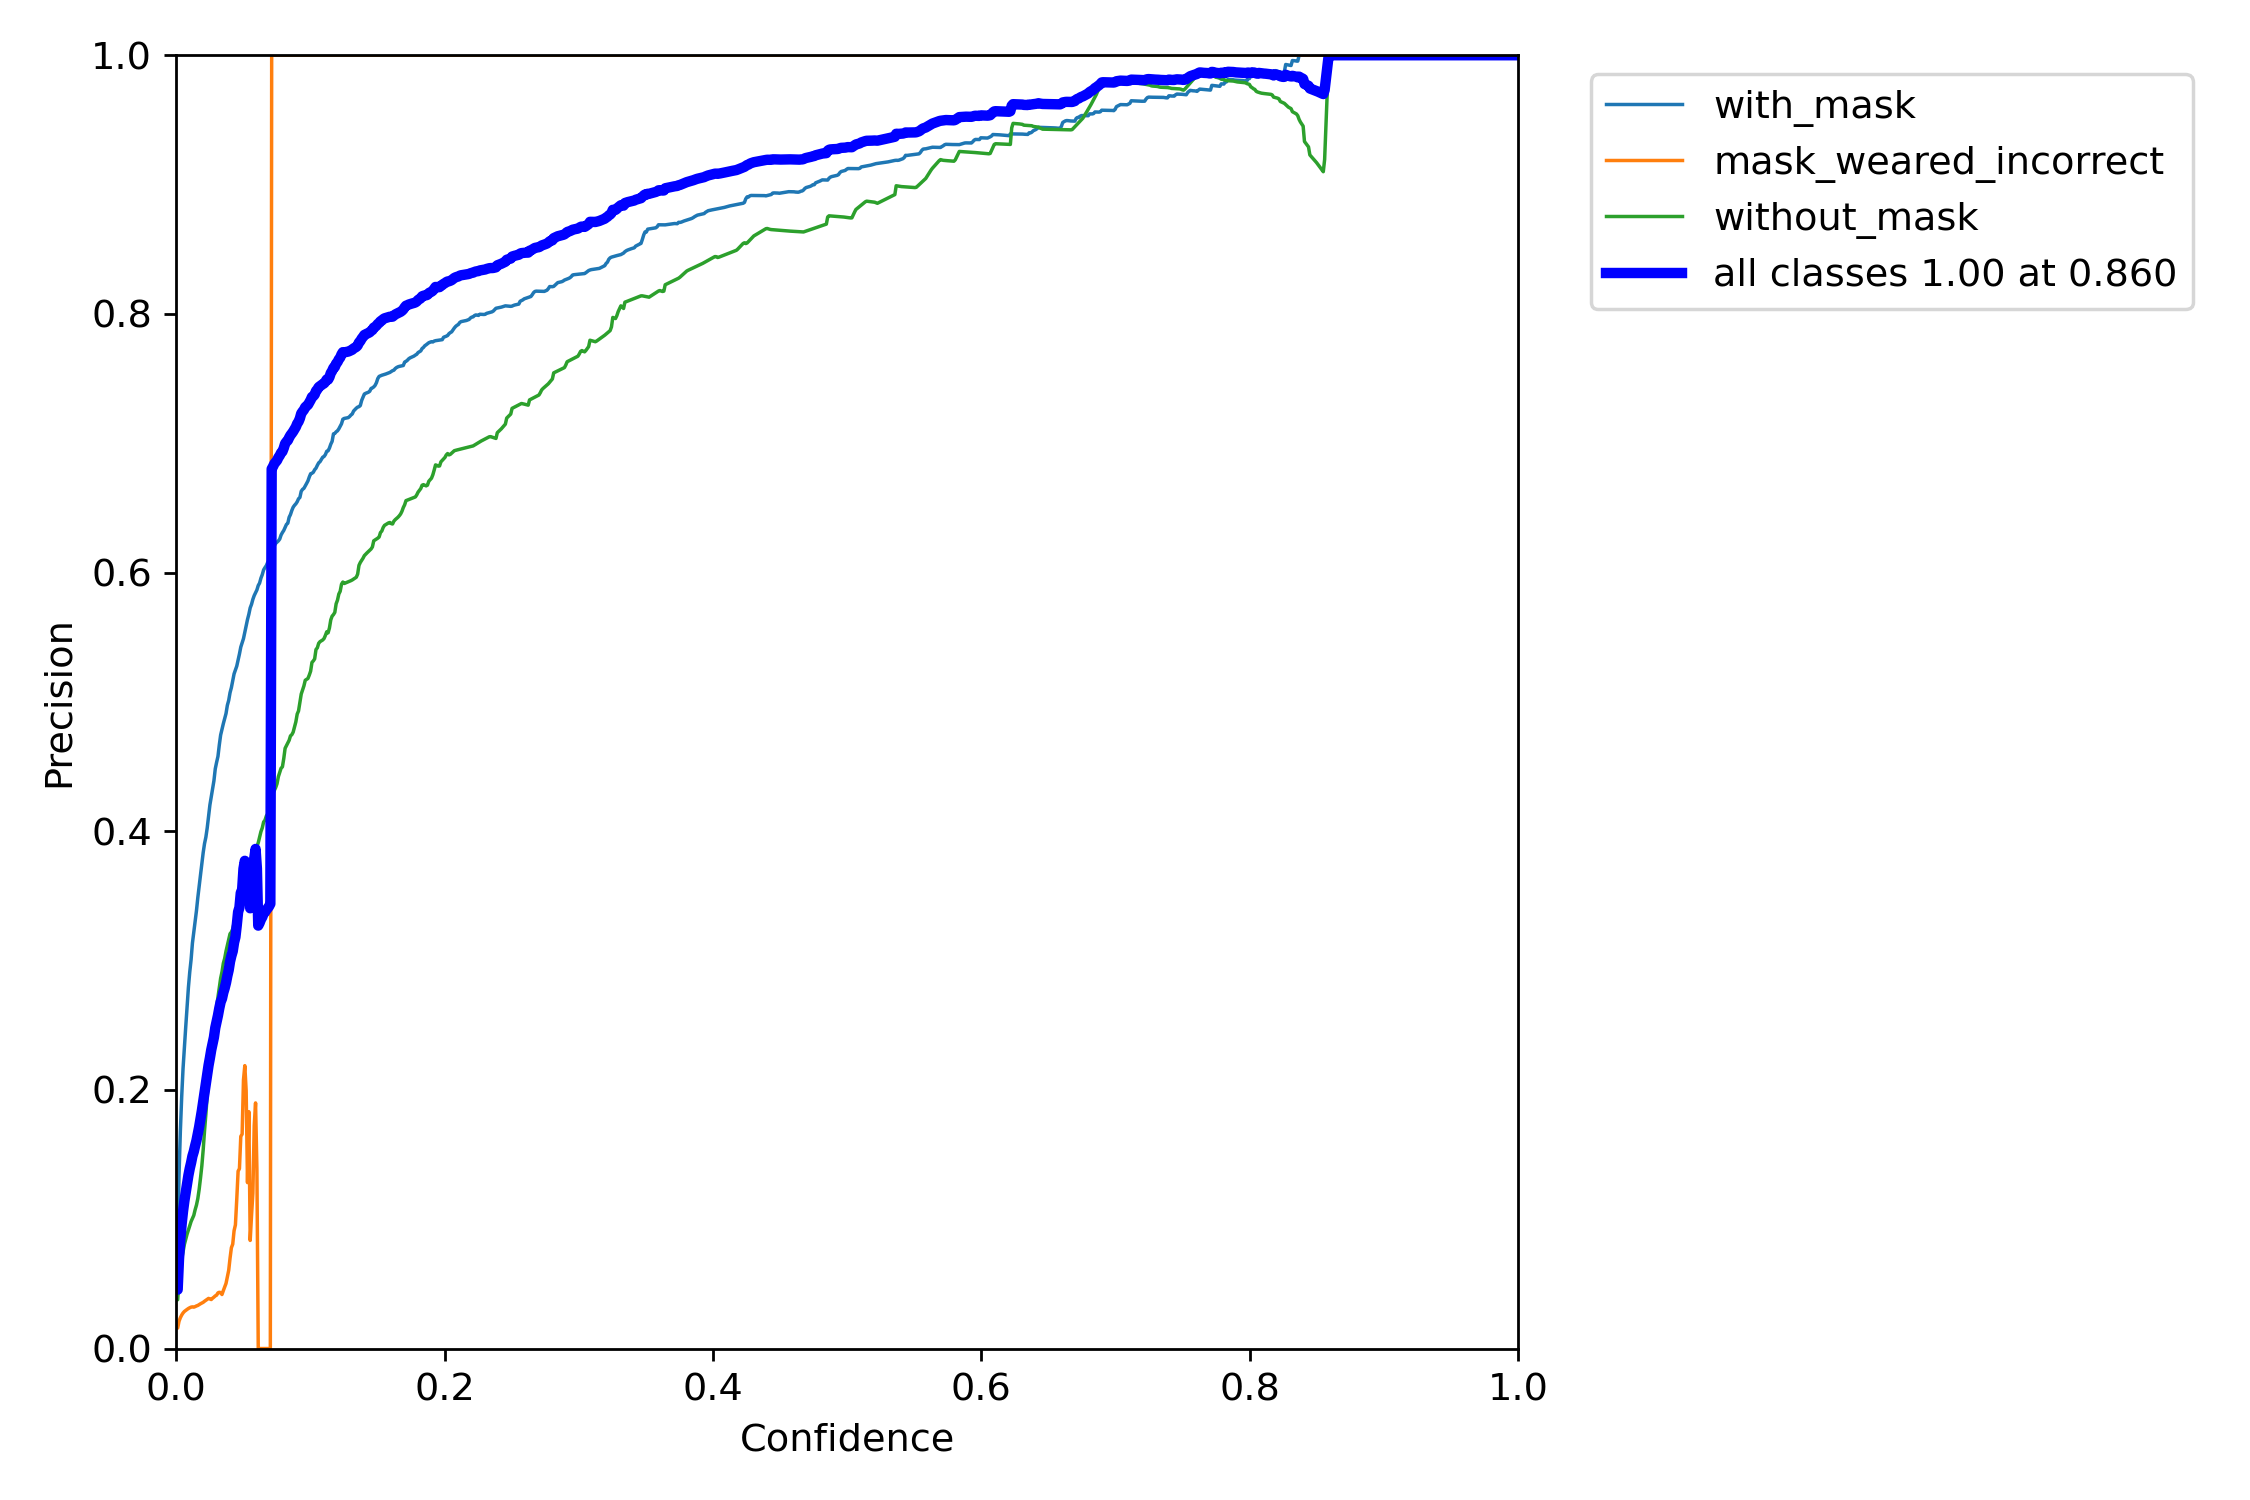

In [28]:
Image(f'{exp_dir}/P_curve.png')

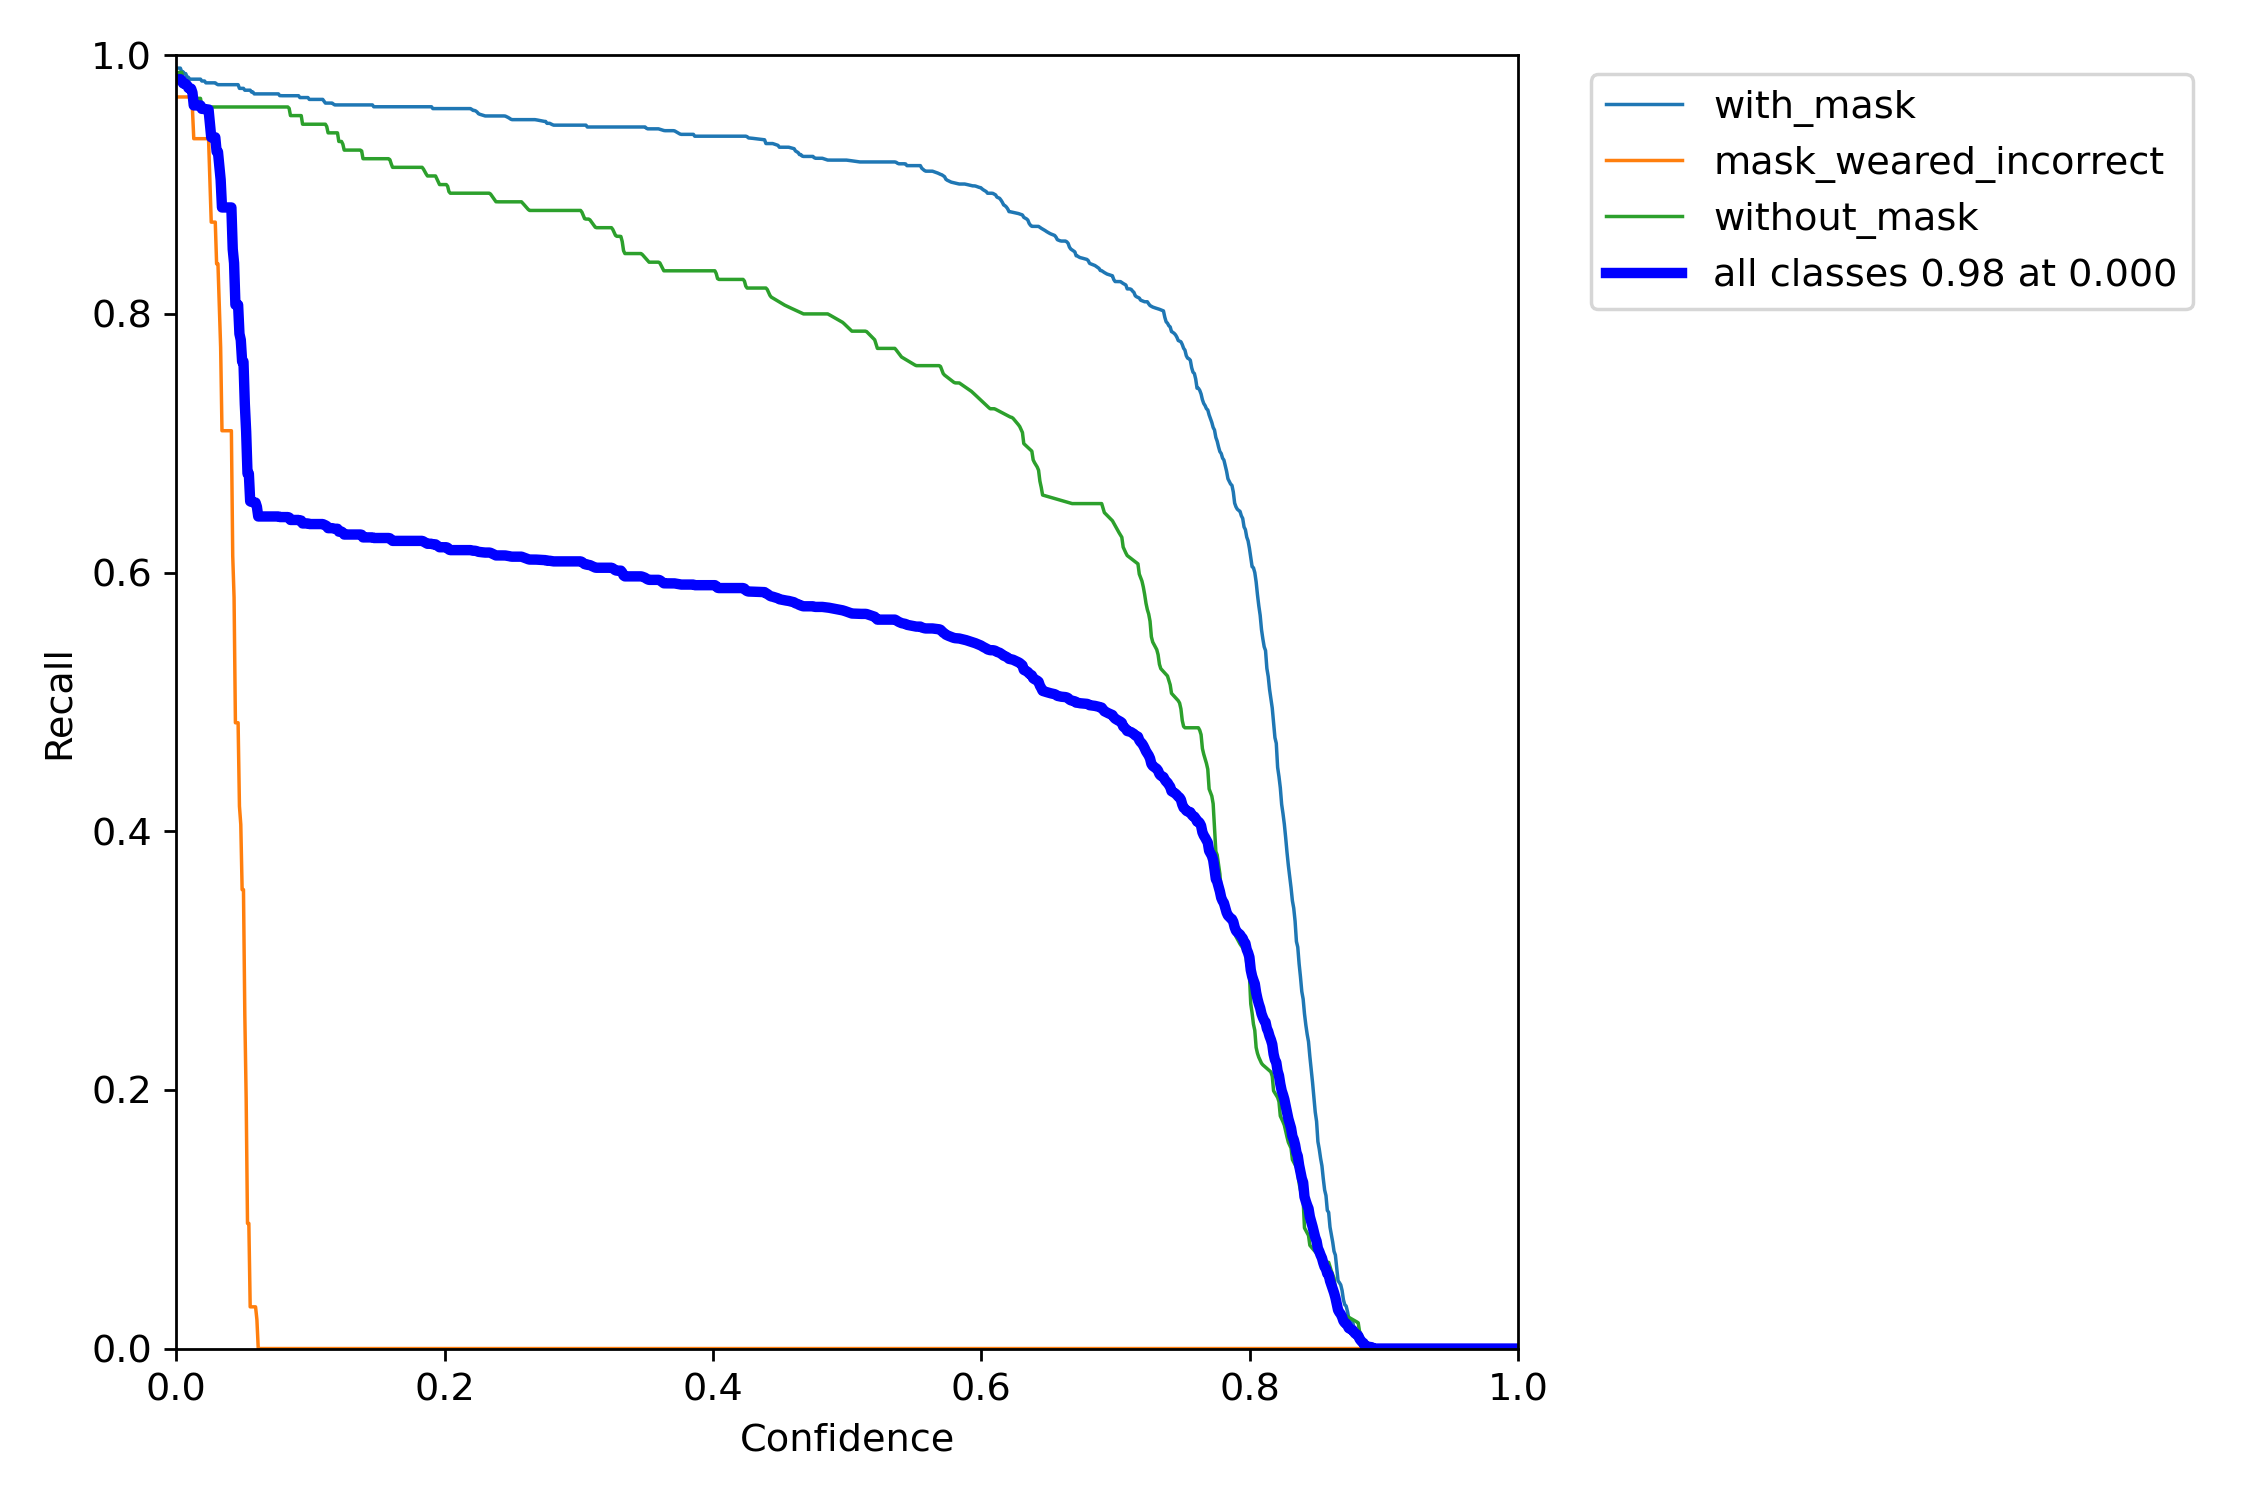

In [29]:
Image(f'{exp_dir}/R_curve.png')

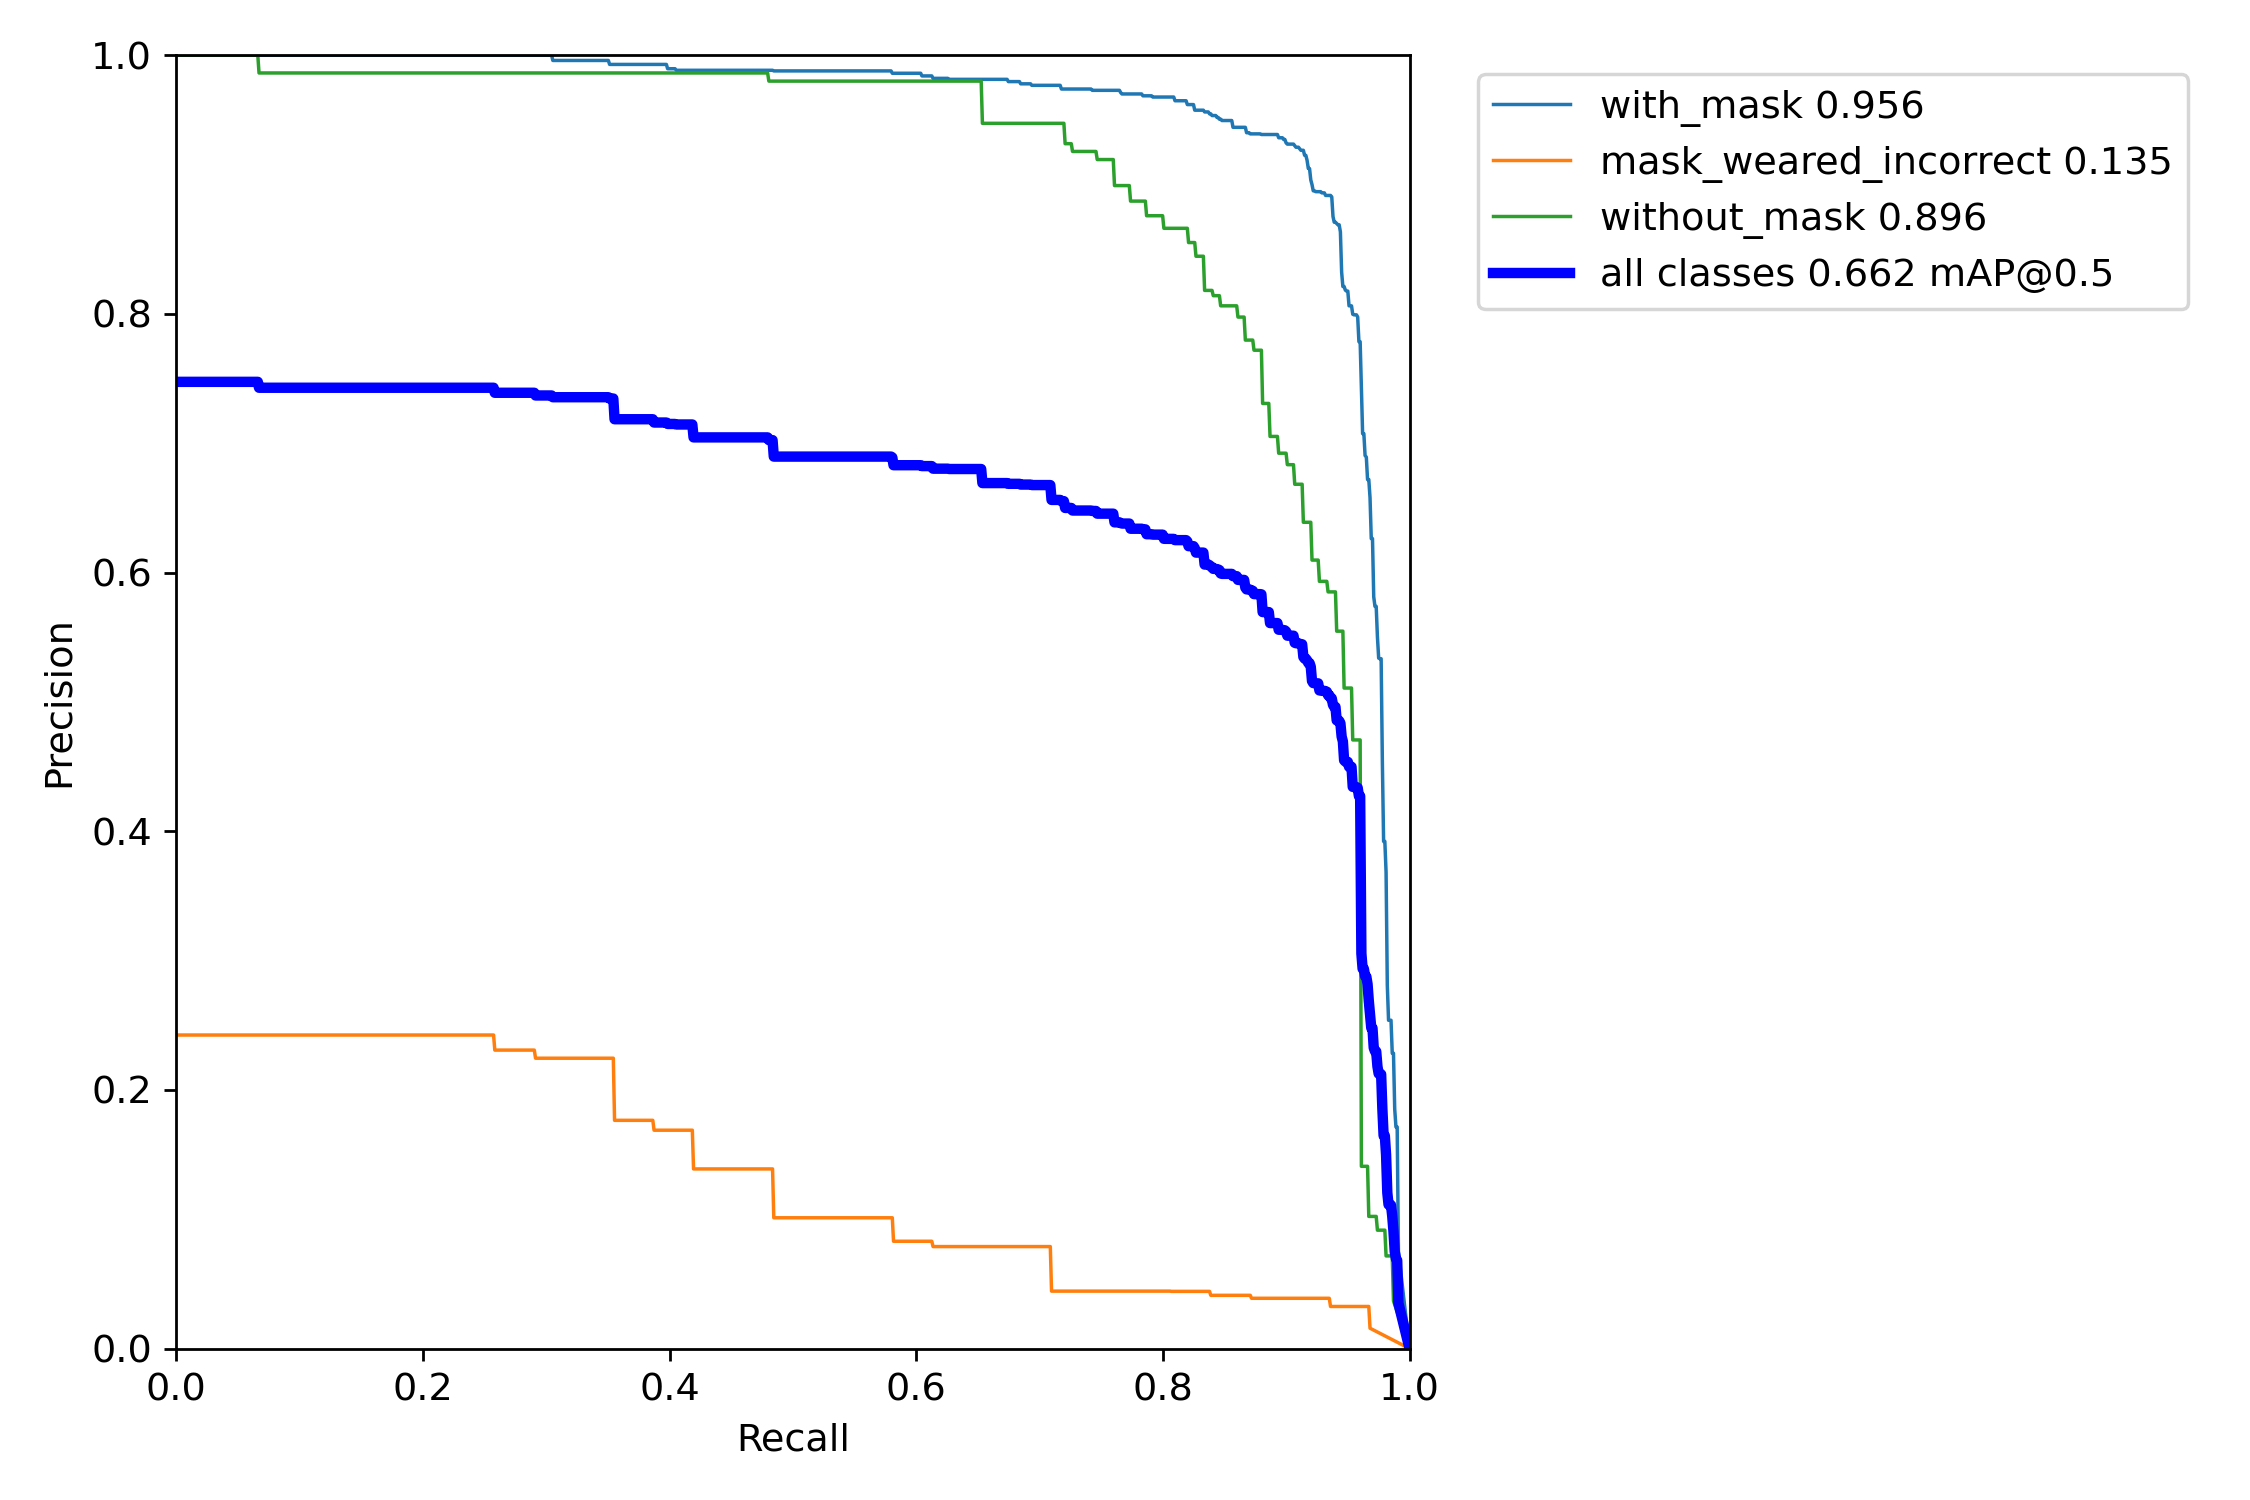

In [30]:
Image(f'{exp_dir}/PR_curve.png')

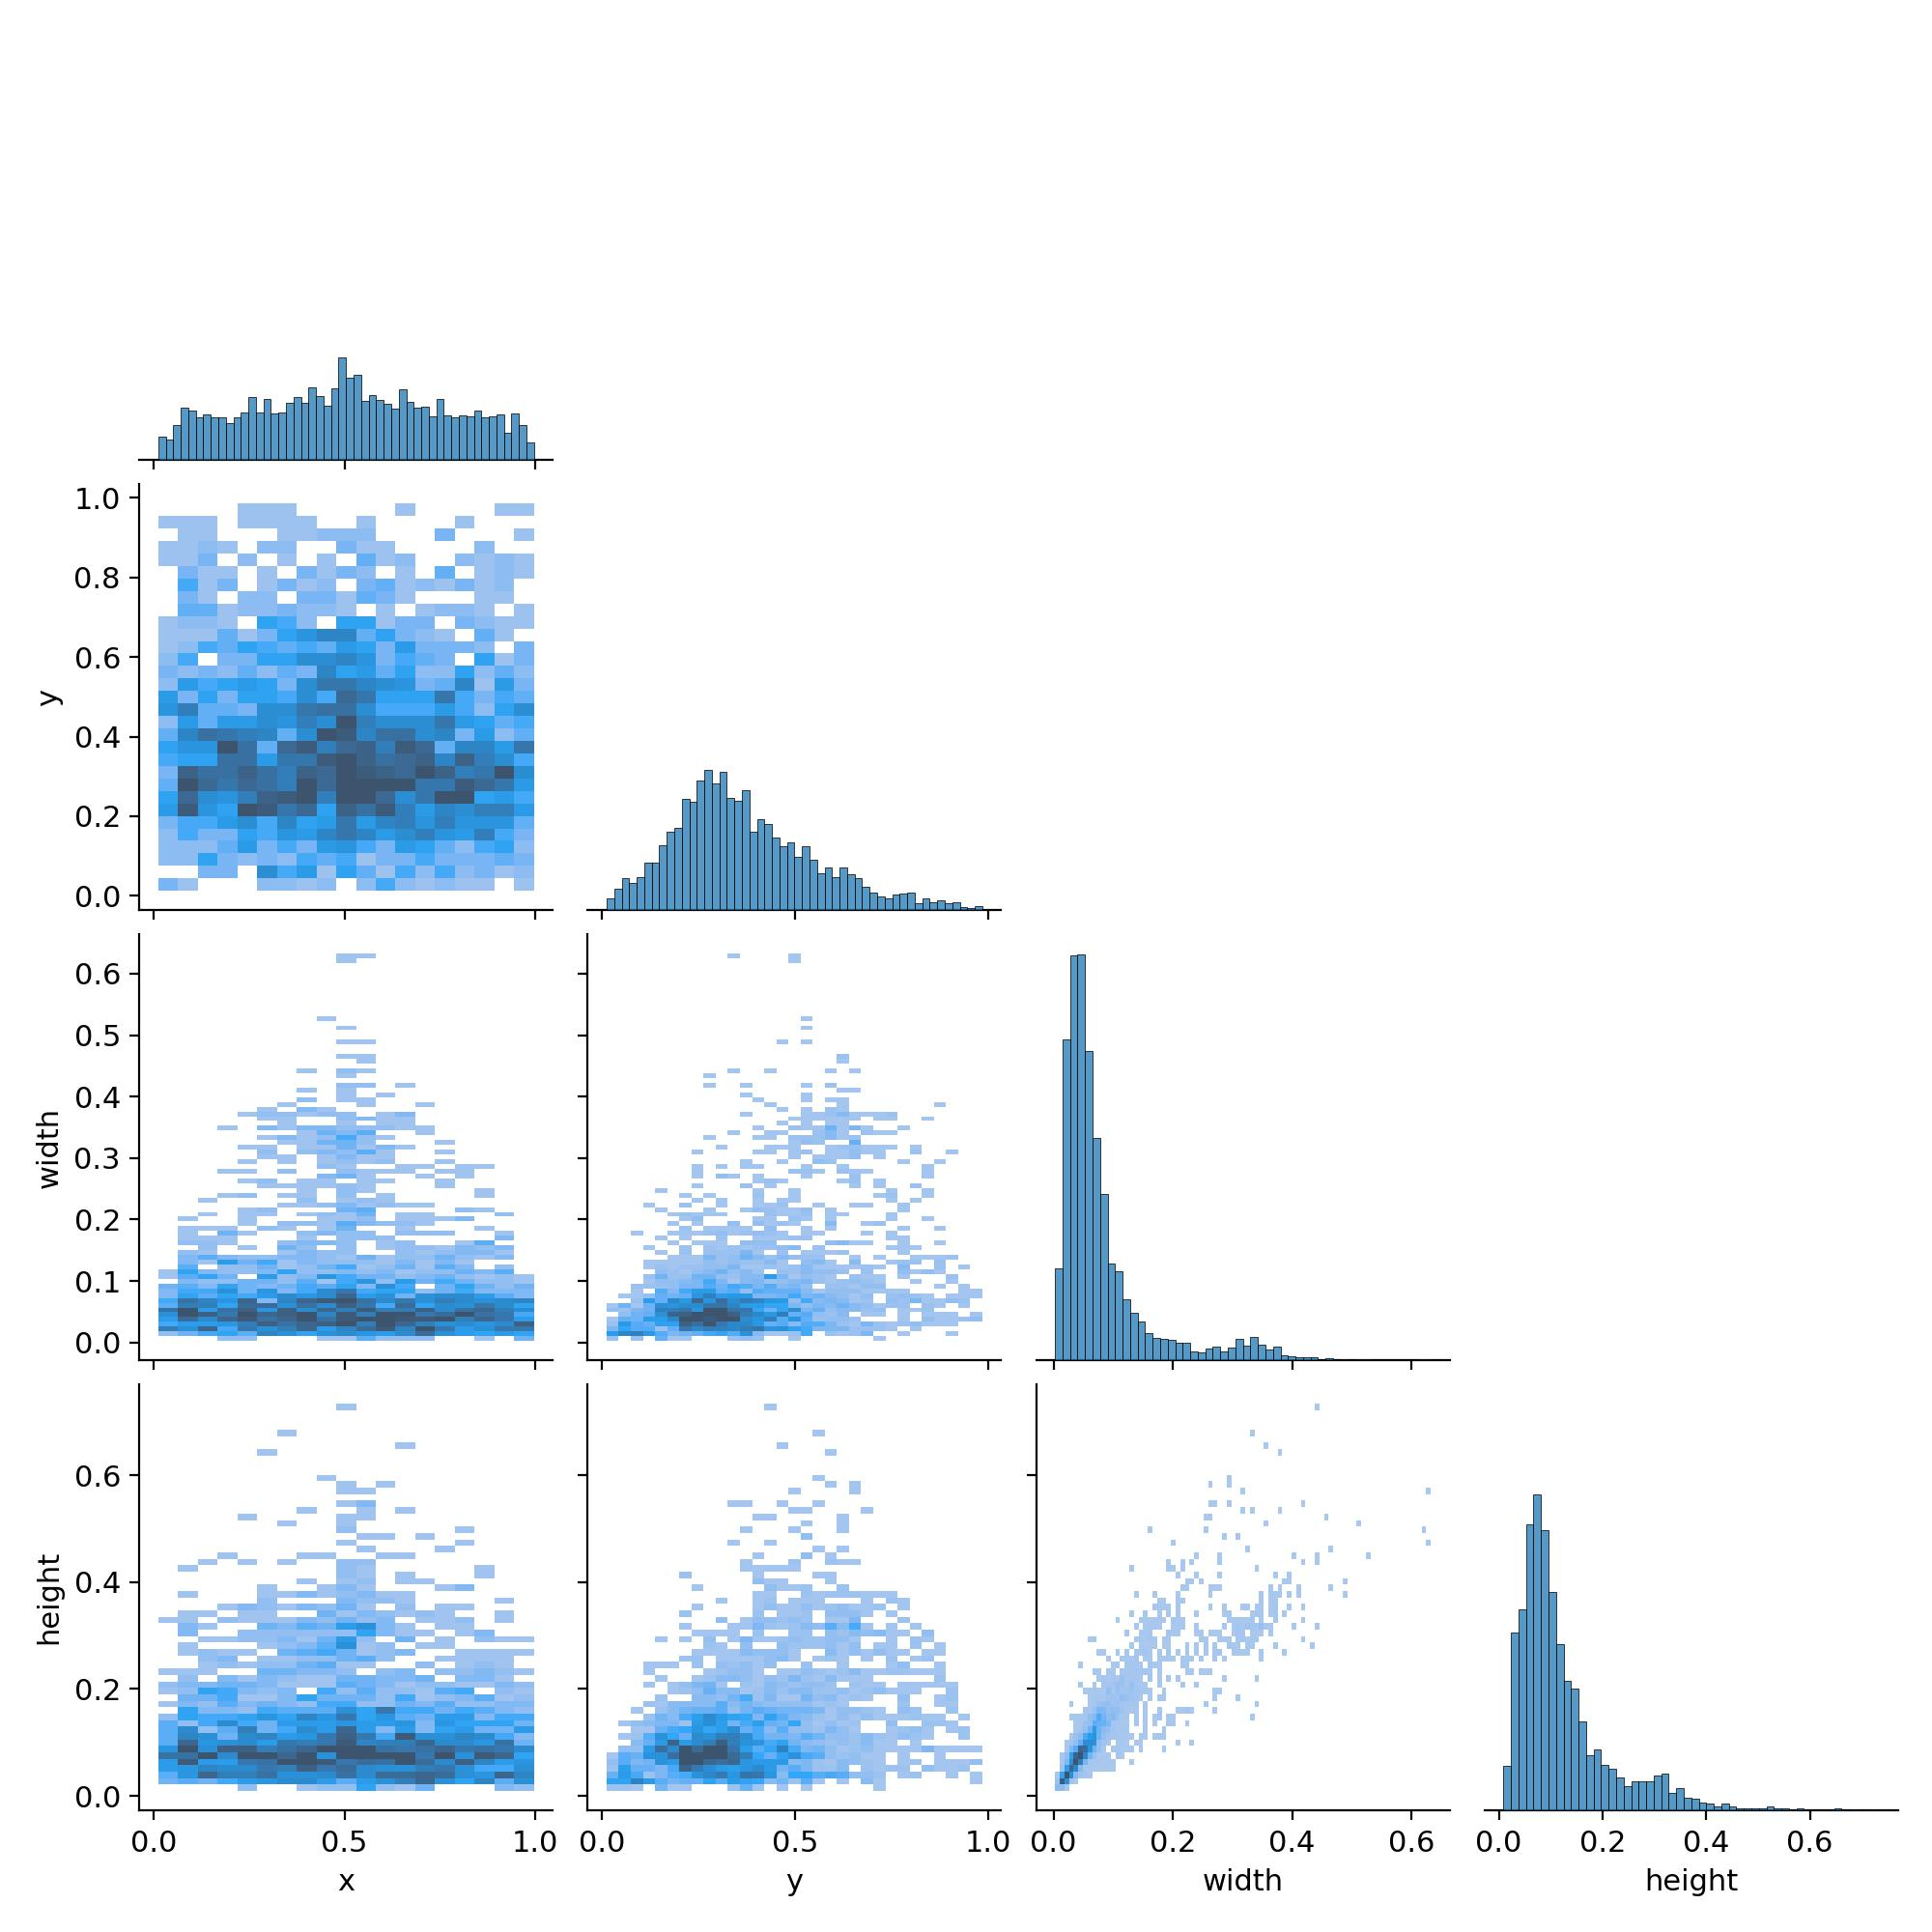

In [31]:
Image(f'{exp_dir}/labels_correlogram.jpg')

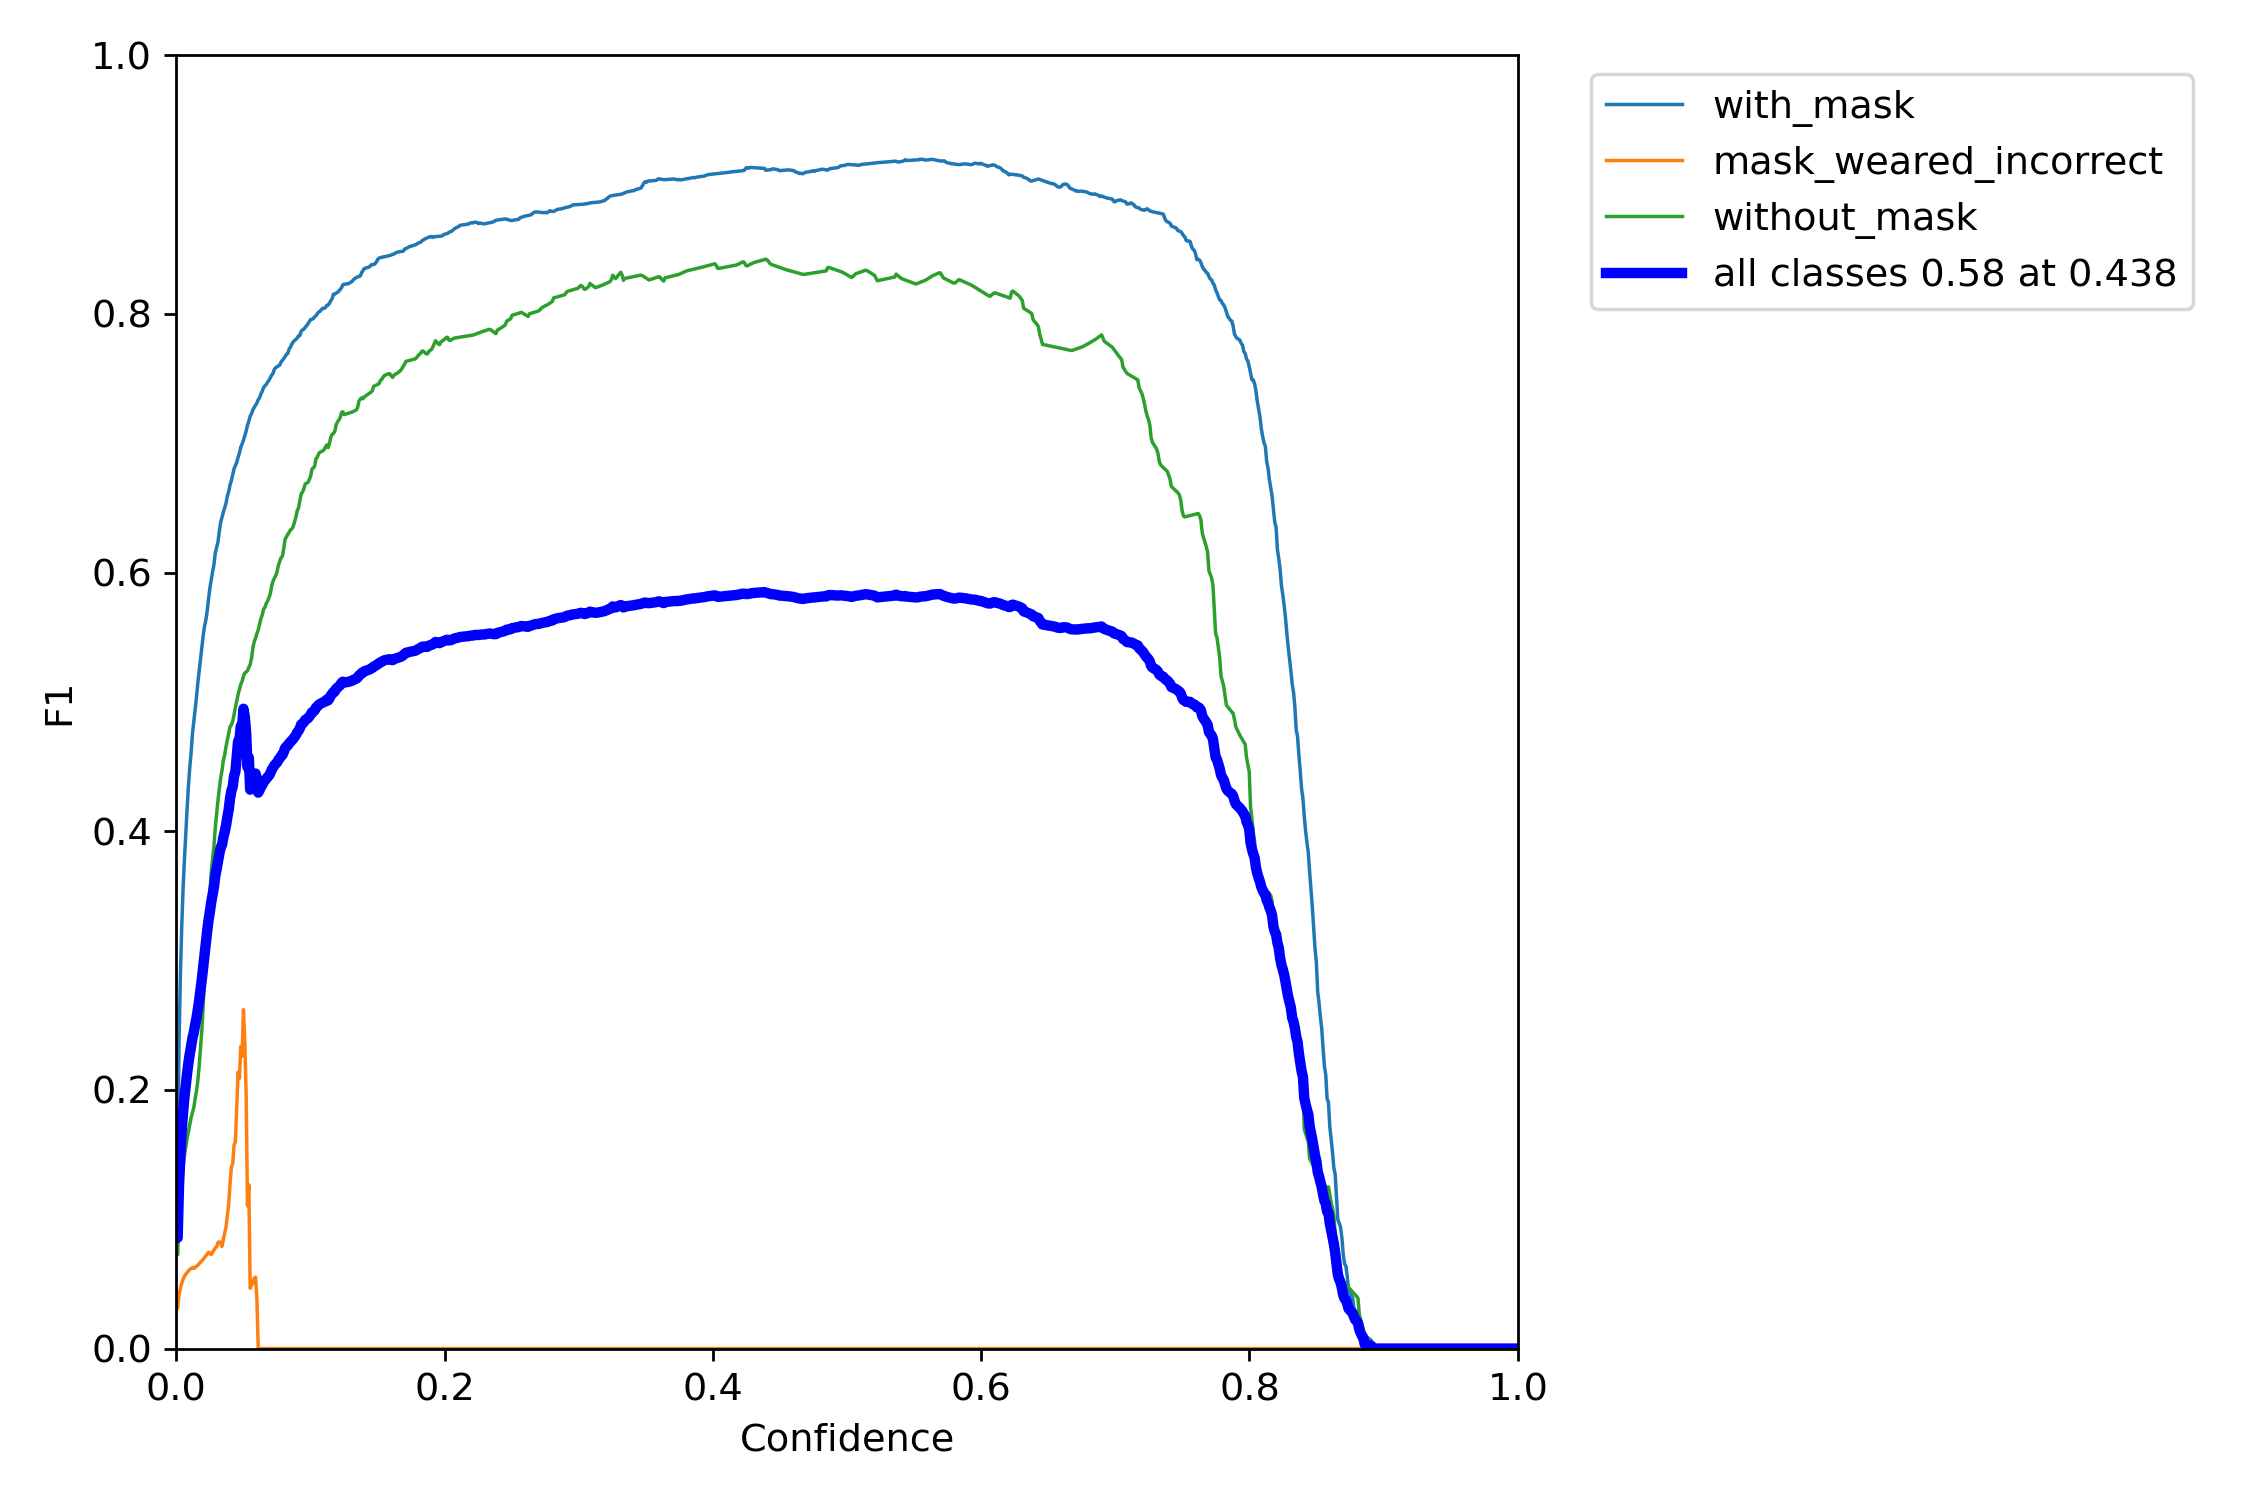

In [32]:
Image(f'{exp_dir}/F1_curve.png')

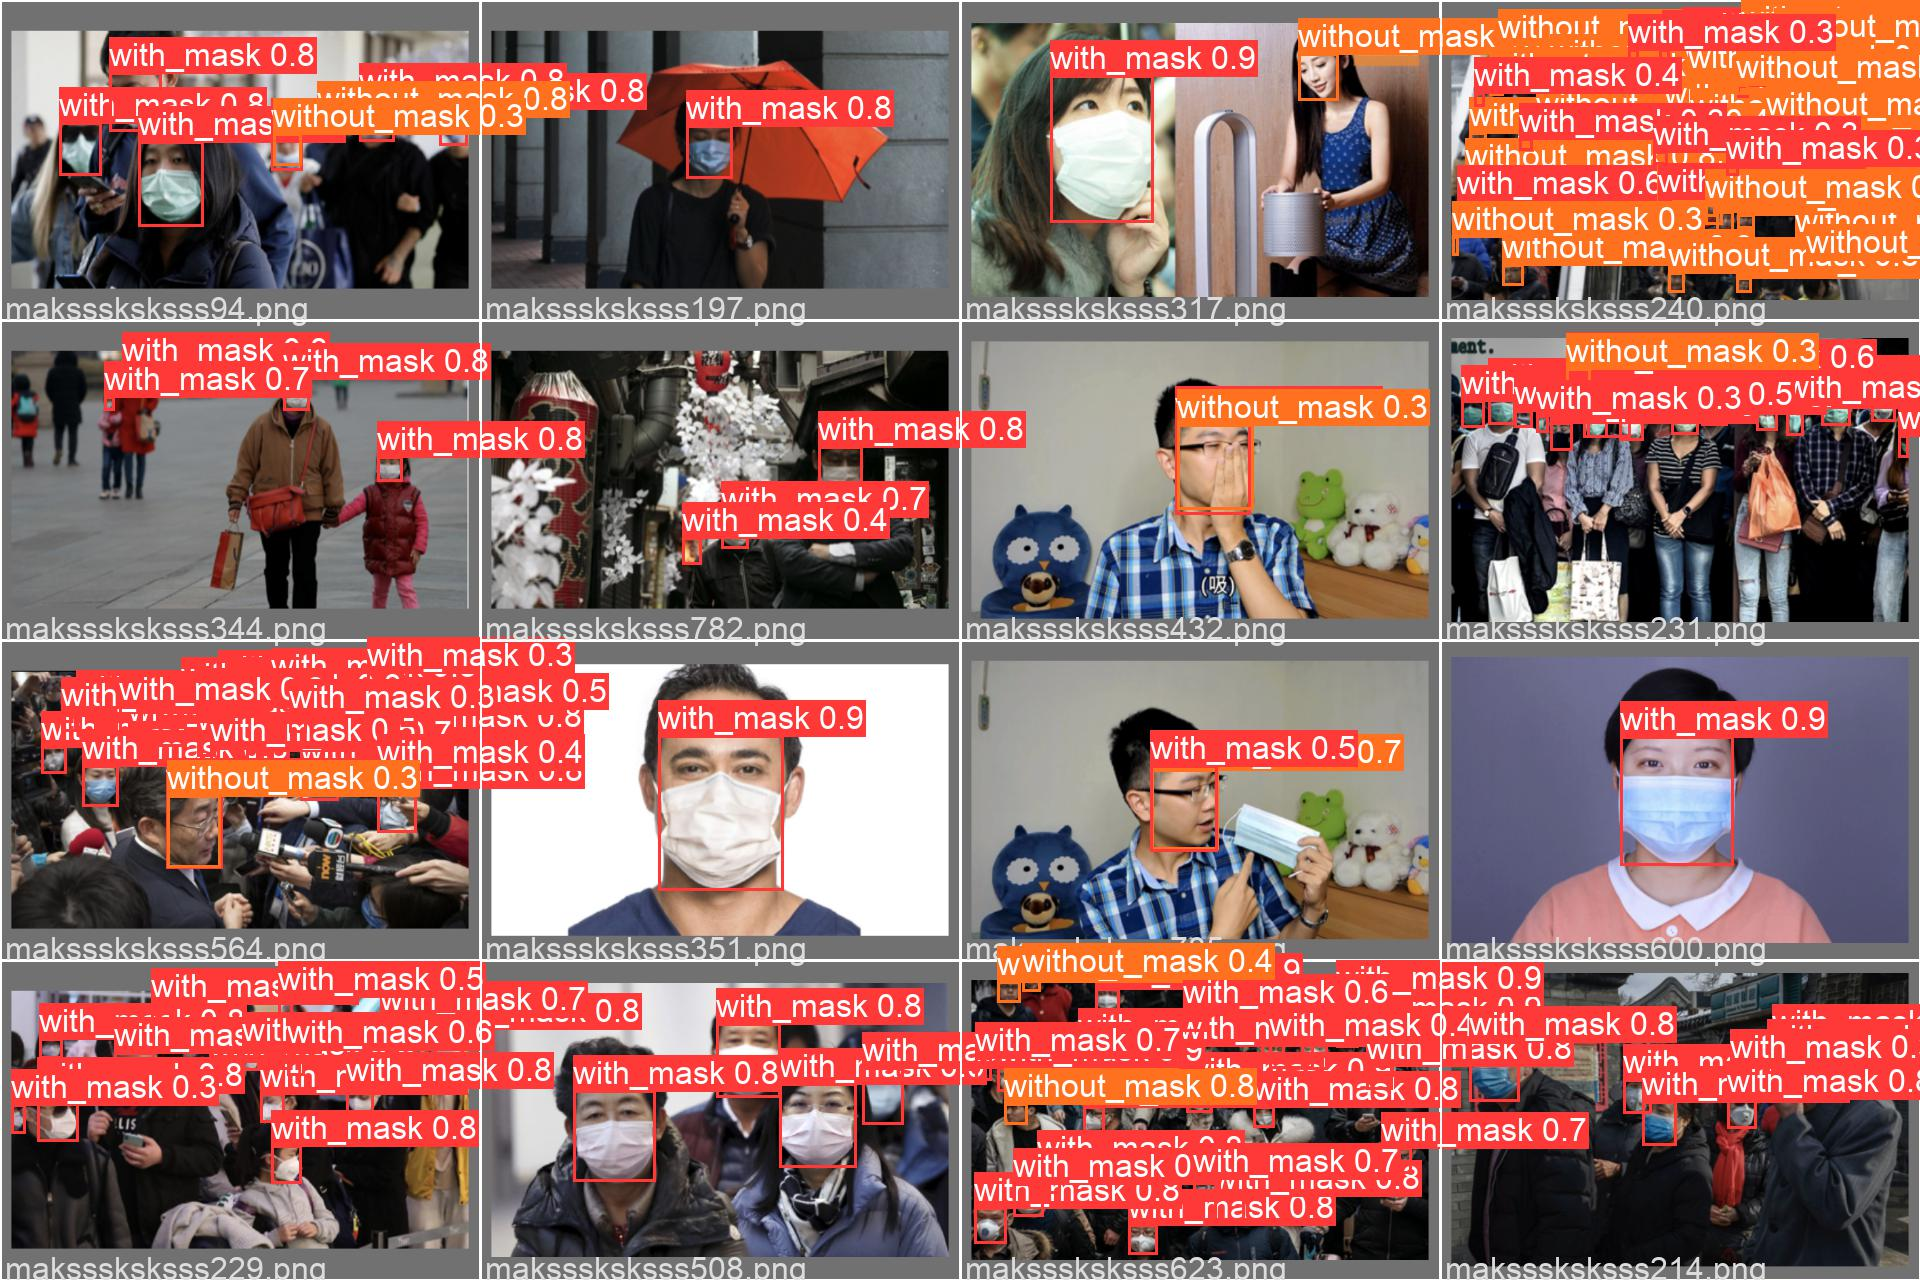

In [33]:
Image(f'{exp_dir}/val_batch1_pred.jpg')

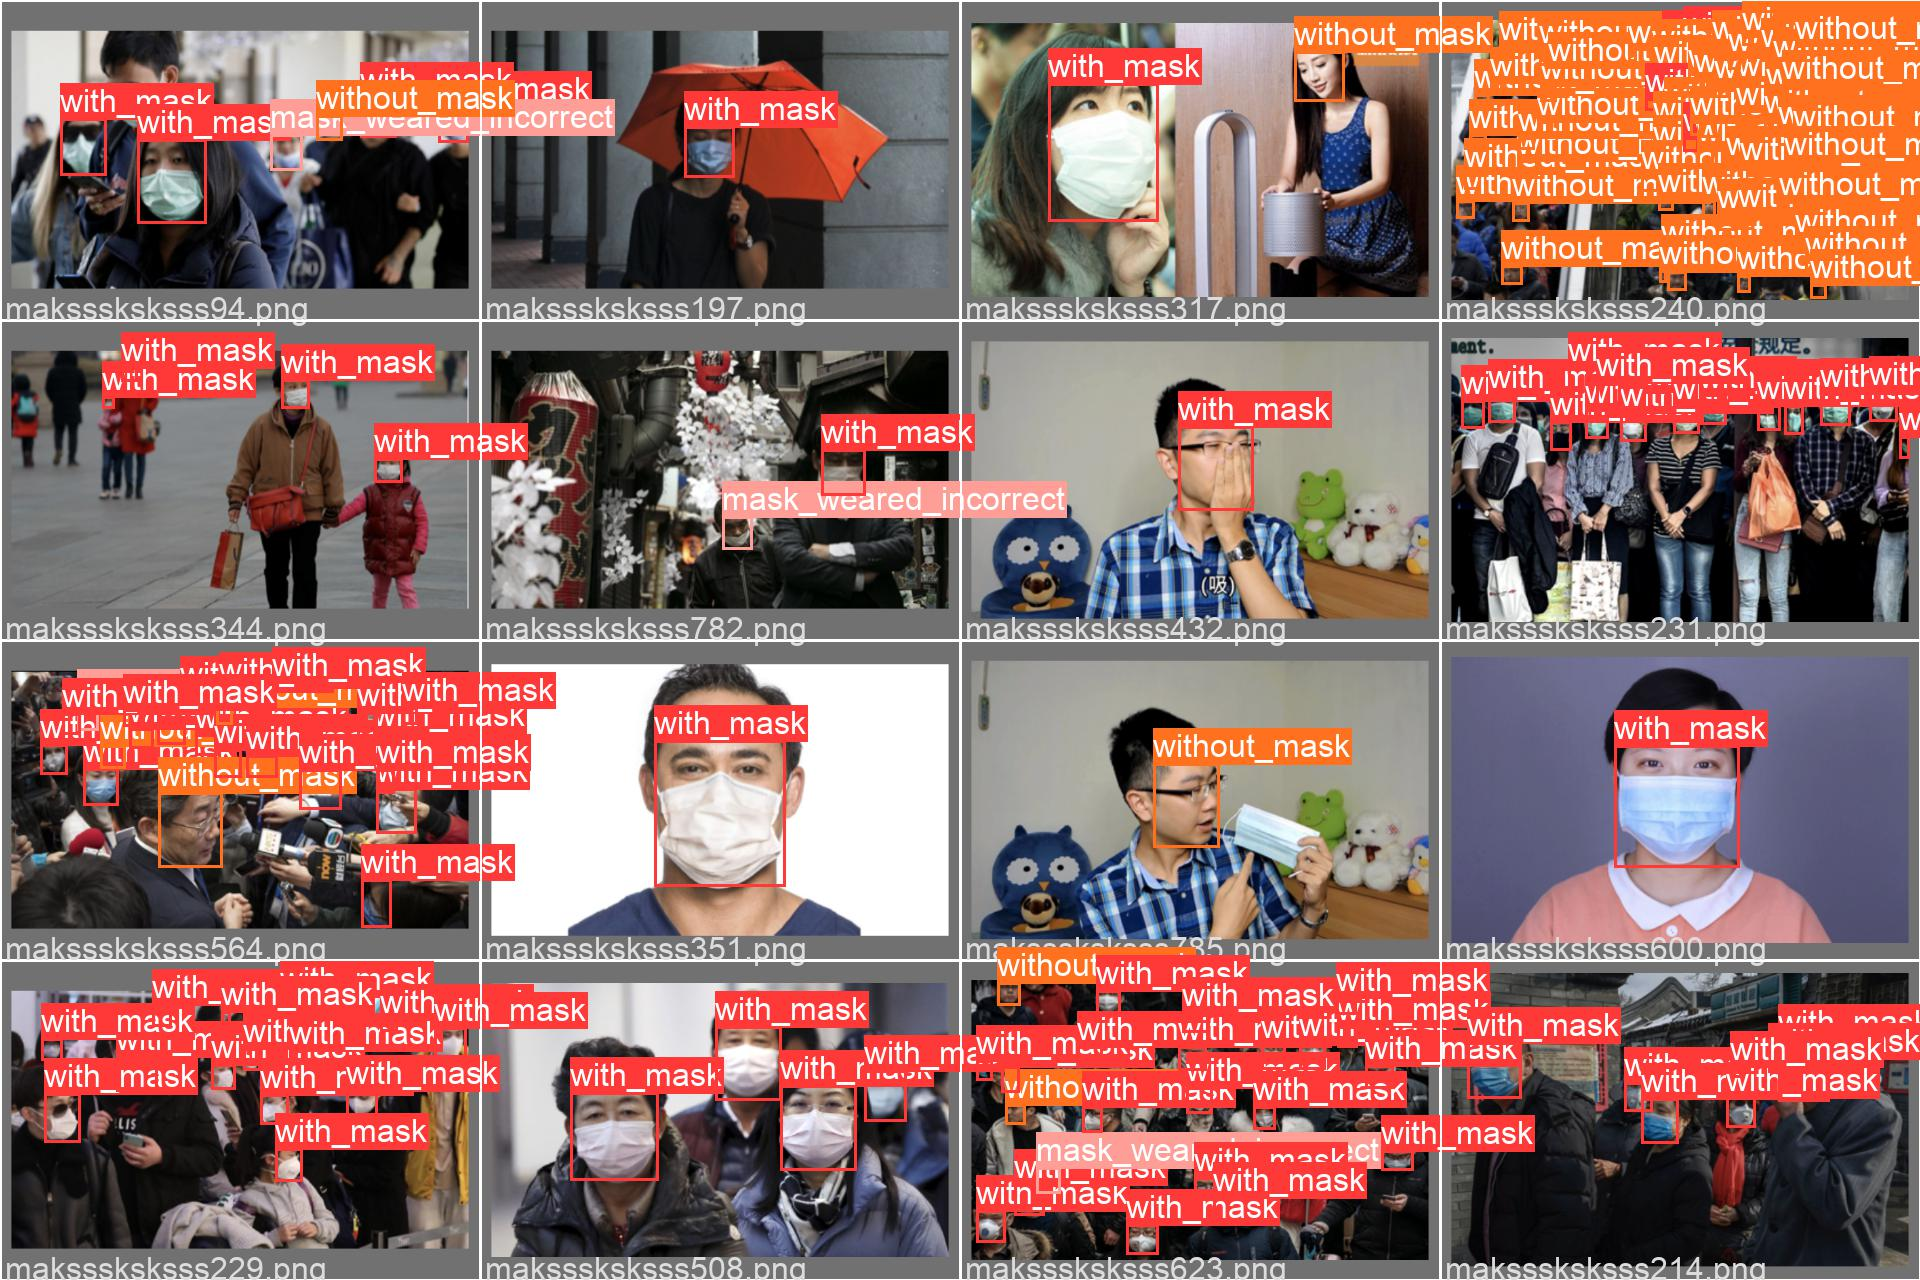

In [34]:
Image(f'{exp_dir}/val_batch1_labels.jpg')

In [35]:
import pandas as pd

df = pd.read_csv(f'{exp_dir}/results.csv')
df[10:].T

,10,11,12,13,14,15,16,17,18,19
epoch,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000
train/box_loss,0.045140,0.044650,0.046440,0.040833,0.039020,0.035988,0.035030,0.033769,0.030479,0.029943
train/obj_loss,0.033293,0.032961,0.032191,0.028620,0.028346,0.029660,0.032089,0.030202,0.027858,0.028971
train/cls_loss,0.008960,0.009033,0.008192,0.007300,0.007547,0.007395,0.007040,0.006997,0.006852,0.006748
metrics/precision,0.892330,0.731410,0.861610,0.911890,0.915650,0.935210,0.910550,0.923760,0.940790,0.914840
metrics/recall,0.537110,0.531800,0.481530,0.539850,0.544140,0.537600,0.577650,0.585510,0.557200,0.585310
metrics/mAP_0.5,0.591340,0.498280,0.552830,0.607240,0.607710,0.613930,0.627760,0.636130,0.637950,0.660750
metrics/mAP_0.5:0.95,0.289060,0.226580,0.305110,0.329730,0.355750,0.348610,0.369400,0.376240,0.366250,0.401610
val/box_loss,0.034515,0.039519,0.038128,0.031879,0.030298,0.031223,0.030203,0.027902,0.028723,0.028125
val/obj_loss,0.029060,0.028952,0.028381,0.027891,0.027544,0.027853,0.027591,0.027314,0.026769,0.026690
